# Определение стоимости автомобилей

<h1>Описание проекта</h1>

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля.

**Цель:** построить модель для определения стоимости автомобилей на основании данных, включающих в себя технические характеристики, комплектации и цены автомобилей.

**Критерии отбора модели:**
- качество предсказания;
- скорость предсказания;
- время обучения.

<h1>Описание данных</h1>

Данные находятся в файле /datasets/autos.csv.

**Признаки:**
- `DateCrawled` - дата скачивания анкеты из базы
- `VehicleType` - тип автомобильного кузова
- `RegistrationYear` - год регистрации автомобиля
- `Gearbox` - тип коробки передач
- `Power` - мощность (л. с.)
- `Model` - модель автомобиля
- `Kilometer` - пробег (км)
- `RegistrationMonth` - месяц регистрации автомобиля
- `FuelType` - тип топлива
- `Brand` - марка автомобиля
- `Repaired` - была машина в ремонте или нет
- `DateCreated` - дата создания анкеты
- `NumberOfPictures` - количество фотографий автомобиля
- `PostalCode` - почтовый индекс владельца анкеты (пользователя)
- `LastSeen` - дата последней активности пользователя

**Целевой признак:**
- `Price` - цена (евро)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-признаков" data-toc-modified-id="Предобработка-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка признаков</a></span></li><li><span><a href="#Подготовка-признаков-к-обучению" data-toc-modified-id="Подготовка-признаков-к-обучению-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка признаков к обучению</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Dummy-model" data-toc-modified-id="Dummy-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dummy model</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></div>

## Подготовка данных

### Подключение библиотек

*Установим и загрузим необходимые библиотеки.*

In [1]:
#!pip install lightgbm -U

#!pip install catboost -U

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import catboost as cat

### Загрузка данных

*Напишем функцию, которая будет считывать данные из csv-файла в датафрейм и сохранять их в соответствующую переменную.*

In [3]:
def read_csv(link_1, link_2):
    try:
        data = pd.read_csv(link_1)
    except:
        data = pd.read_csv(link_2)
    return data

*Считаем данные.*

In [4]:
data = read_csv('C:\\Users\\user\\Desktop\\jupiter_notebook\\otsenka_stoimosti_avtomobiley\\autos.csv', '/datasets/autos.csv')

### Изучение данных

*Выведем общую информацию о датасете.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


*Удалим явные дубликаты.*

In [8]:
data = data.drop_duplicates()

*Удалим ненужные для дальнейшей работы столбцы.*

In [9]:
data = data.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)

### Предобработка признаков

*Изучим распределение цен.*

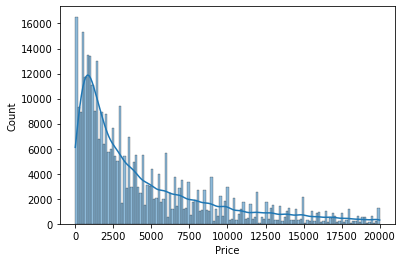

In [10]:
sns.histplot(x=data['Price'], kde=True);

*Заметим наличие объявлений с ценой, равной 0. Найдем количество таких объявлений.*

In [11]:
data.loc[data['Price']==0, 'Price'].count()

10772

*Данные о нулевой цене явно ошибочны. Восстановить целевой признак в этих объектах не представляется возможным, поэтому удалим их.*

In [12]:
data = data.loc[data['Price']!=0]

*Рассмотрим данные в столбце* `Model`. *Найдем количество пропущенных и уникальных значений.*

In [13]:
data['Model'].isna().sum()

17521

In [14]:
len(data['Model'].unique())

251

*Данные в этом столбце имеют важное значение для предсказания цены, ввиду отсутствия возможности восстановления данных, удалим строки с пропущенными значениями.*

In [15]:
data = data.dropna(subset=['Model'])

*Изучим распределение данных в столбце* `Power`.

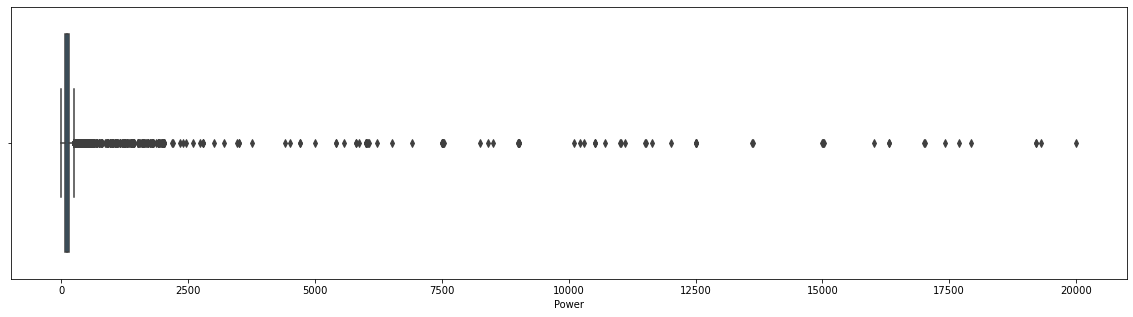

In [16]:
plt.figure(figsize=(20,5))
sns.boxplot(x=data['Power']);

*Найдем количество автомобилей с мощностью равной 0 или больше 700 л.с..*

In [17]:
 data.loc[(data['Power'] > 700) | (data['Power'] == 0), 'Power'].count()

31623

*Заполним все непавдоподобные значения медианными среди автомобилей той же модели.*

In [18]:
data.loc[(data['Power'] > 700) | (data['Power'] <= 0), 'Power'] = None
data['Power'] = data['Power'].fillna(data.groupby('Model')['Power'].transform('median'))
data = data.dropna(subset=['Power'])
data['Power'] = data['Power'].astype('int64')

*Изучим данные в столбце* `RegistrationYear`. *Найдем количество объявлений с некорректной датой, установив нижнее значение на 1950 год.*

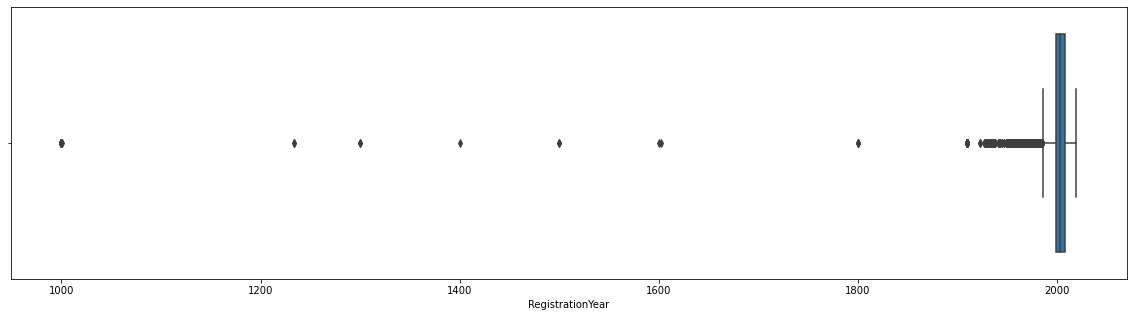

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(x=data.loc[data['RegistrationYear'] <= 2023, 'RegistrationYear']);

In [20]:
data.loc[(data['RegistrationYear'] < 1950) | (data['RegistrationYear'] > 2023), 'RegistrationYear'].count()

157

In [21]:
data.loc[(data['RegistrationYear'] < 1950) | (data['RegistrationYear'] > 2023)].head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
15,450,small,1910,NaN,60,ka,5000,0,petrol,ford,NaN
1928,7000,suv,1945,manual,48,other,150000,2,petrol,volkswagen,no
10183,1250,NaN,1910,NaN,116,other,5000,0,NaN,audi,NaN
12946,49,NaN,5000,NaN,101,golf,5000,12,NaN,volkswagen,NaN
16062,190,NaN,1000,NaN,131,mondeo,5000,0,NaN,ford,NaN


*Удалим эти строки.*

In [22]:
data = data.loc[(data['RegistrationYear'] >= 1950) & (data['RegistrationYear'] <= 2023)]

*Изучим данные в столбце* `VehicleType`.

In [23]:
data['VehicleType'].unique()

array([nan, 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       'coupe', 'other'], dtype=object)

*Заполним пропуски в столбце в зависимости от наиболее часто встречающегося типа автомобиля для каждой модели.*

In [24]:
data['VehicleType'] = data['VehicleType'].fillna(data
                                                  .groupby('Model')['VehicleType']
                                                  .transform(lambda x: x.value_counts().idxmax())
                                                 )

*Изучим данные в столбце* `Gearbox`.

In [25]:
data['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

*Заполним пропуски в столбце в зависимости от наиболее часто встречающегося типа коробки передач для каждой модели.*

In [26]:
data['Gearbox'] = data['Gearbox'].fillna(data
                                         .groupby('Model')['Gearbox']
                                         .transform(lambda x: x.value_counts().idxmax())
                                        )

*Изучим данные в столбце* `FuelType`.

In [27]:
data['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

*Заполним пропуски в столбце в зависимости от наиболее часто встречающегося типа топлива для каждой модели.*

In [28]:
data['FuelType'] = data['FuelType'].fillna(data
                                           .groupby('Model')['FuelType']
                                           .transform(lambda x: x.value_counts().idxmax())
                                          )

*Изучим распределение данных в столбце* `Kilometer`.

<AxesSubplot:xlabel='Kilometer'>

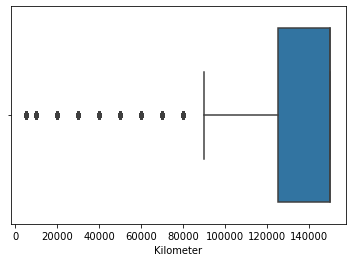

In [29]:
sns.boxplot(x=data['Kilometer'])

*Заполним пропуски в столбце `Repaired` значением `unknown`.*

In [30]:
data['Repaired'] = data['Repaired'].fillna('unknown')

### Подготовка признаков к обучению

*Разделим признаки на категориальные и численные.*

In [31]:
categorical = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']

*Подготовим несколько выборок с использованием разных способов кодирования категориальных признаков. Датасет поделим в отношении 4:1.*

In [32]:
data_ohe = data.copy()
data_ord = data.copy()

`Без кодирования`

In [33]:
features = data.drop('Price', axis=1)
target = data['Price']

In [34]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

`С применением OneHotEncoding`.

In [35]:
features_train_ohe = features_train.copy()
features_test_ohe = features_test.copy()
target_train_ohe = target_train.copy()
target_test_ohe = target_test.copy()

In [36]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first') 

features_train_trans = pd.DataFrame(
    encoder.fit_transform(features_train_ohe[categorical]).toarray(),
    columns=encoder.get_feature_names_out()
)

features_test_trans = pd.DataFrame(
    encoder.transform(features_test_ohe[categorical]).toarray(),
    columns=encoder.get_feature_names_out()
)

In [37]:
features_train_ohe = features_train_ohe.reset_index(drop=True)
target_train_ohe = target_train_ohe.reset_index(drop=True)
features_test_ohe = features_test_ohe.reset_index(drop=True)
target_test_ohe = target_test_ohe.reset_index(drop=True)

In [38]:
features_train_ohe = features_train_ohe.drop(categorical, axis=1)
features_test_ohe = features_test_ohe.drop(categorical, axis=1)

In [39]:
features_train_ohe = features_train_ohe.join(features_train_trans)
features_test_ohe = features_test_ohe.join(features_test_trans)

`С применением OrdinalEncoding`.

In [40]:
features_train_ord = features_train.copy()
features_test_ord = features_test.copy()
target_train_ord = target_train.copy()
target_test_ord = target_test.copy()

encoder_ord = OrdinalEncoder()

features_train_ord[categorical] = encoder_ord.fit_transform(features_train_ord[categorical])
features_test_ord[categorical] = encoder_ord.transform(features_test_ord[categorical])

### Масштабирование признаков

*Проведём масштабирование признаков с помощью метода `StandardScaler`.*

In [41]:
def stadscal(data_train, data_test, col):
    numeric = col
    scaler = StandardScaler()
    data_train[numeric] = scaler.fit_transform(data_train[numeric])
    data_test[numeric] = scaler.transform(data_test[numeric])
    return data_train, data_test

In [42]:
features_train_ohe, features_test_ohe = stadscal(features_train_ohe, features_test_ohe, features_train_ohe.columns)

features_train_ord, features_test_ord = stadscal(features_train_ord, features_test_ord, features_train_ord.columns)

features_train, features_test = stadscal(features_train, features_test, numeric)

### Вывод

В ходе выполнения данного шага работы были выполнены следующие действия:

- Загрузка и первичный анализ данных. Удаление дубликатов.
- Отбор признаков для построения модели.
- Обработка пропущенных значений и выбросов.
- Разделение данных на обучающую и тестовую выборки, обработка категориальных признаков и их масштабирование.

## Обучение моделей

### Dummy model

*Для начала создадим константную `dummy` модель. Она всегда будет предсказывать среднее значение Price. (среднее значение на практике дало меньшее значение RMSE, чем медианное). Рассчитаем RMSE для base-line модели.*

In [43]:
pred_dummy = pd.Series(round(target_train.mean()), index=features_train.index)

In [44]:
print(f'RMSE для Dummy модели на тренировочной выборке: {round(mean_squared_error(target_train, pred_dummy, squared=False), 2)}')

RMSE для Dummy модели на тренировочной выборке: 4529.02


### LinearRegression

*Обучим модель линейной регрессии `LinearRegression`. Посчитаем скорость обучения, скорость предсказания и величину RMSE.*

In [45]:
%%time
model_lm = LinearRegression() 
mse = cross_val_score(model_lm, features_train_ohe, target_train_ohe, cv=5, scoring='neg_mean_squared_error')

CPU times: total: 1min 16s
Wall time: 21.6 s


In [46]:
print(f'RMSE для LinearRegression модели на тренировочной выборке: {round((-mse.mean()) ** 0.5, 2)}')

RMSE для LinearRegression модели на тренировочной выборке: 2687.63


In [47]:
%%time
model_lm.fit(features_train_ohe, target_train_ohe)

CPU times: total: 20.3 s
Wall time: 5.07 s


LinearRegression()

In [48]:
%%time
pred_lm = model_lm.predict(features_train_ohe)

CPU times: total: 484 ms
Wall time: 146 ms


### LightGBM

*Обучим модель с градиентным бустингом `LightGBM`. Подбор гиперпараметров проведем с помощью GridSearch.*

In [49]:
%%time
param = {'learning_rate': [0.1, 0.3, 0.5, 0.7],
              'max_depth': [15, 20, 30, 35]
             }

model_lgb = lgb.LGBMRegressor()

# инициализируем GridSearchCV
cv = GridSearchCV(estimator = model_lgb, 
                           param_grid = param, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'neg_mean_squared_error',
                          )
cv.fit(features_train_ord, target_train_ord, categorical_feature=categorical)

print(cv.best_params_)

C:\Anaconda_3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


{'learning_rate': 0.5, 'max_depth': 20}
CPU times: total: 7.56 s
Wall time: 35 s


In [50]:
print(f'RMSE для LightGBM модели на тренировочной выборке: {round((-cv.best_score_) ** 0.5, 2)}')

RMSE для LightGBM модели на тренировочной выборке: 1805.62


In [51]:
best_model_lgb = cv.best_estimator_

In [52]:
%%time
best_model_lgb.fit(features_train_ord, target_train_ord, categorical_feature=categorical)

CPU times: total: 7.73 s
Wall time: 4.04 s


LGBMRegressor(learning_rate=0.5, max_depth=20)

In [53]:
%%time
pred_lgbm = best_model_lgb.predict(features_train_ord)

CPU times: total: 1.11 s
Wall time: 132 ms


### CatBoost

*Обучим модель с градиентным бустингом `CatBoost`. Подбор гиперпараметров проведем с помощью GridSearch.*

In [54]:
%%time
param = {'learning_rate': [0.1, 0.2, 0.3],
        'depth': [5, 10],
         'iterations': [300]
             }

model_cat = cat.CatBoostRegressor()

# инициализируем GridSearchCV
cv_cat = GridSearchCV(estimator = model_cat, 
                           param_grid = param, 
                           cv = 3,
                           n_jobs = -1, 
                           scoring = 'neg_mean_squared_error',
                          )
cv_cat.fit(features_train, target_train, cat_features=categorical, verbose=50)

print(cv_cat.best_params_)

0:	learn: 3598.0140702	total: 321ms	remaining: 1m 35s
50:	learn: 1601.8110870	total: 9.02s	remaining: 44s
100:	learn: 1515.9377916	total: 18.4s	remaining: 36.2s
150:	learn: 1457.9958638	total: 27.6s	remaining: 27.2s
200:	learn: 1416.0824020	total: 36.6s	remaining: 18s
250:	learn: 1383.2982559	total: 45.7s	remaining: 8.91s
299:	learn: 1355.3147561	total: 54.6s	remaining: 0us
{'depth': 10, 'iterations': 300, 'learning_rate': 0.3}
CPU times: total: 6min 50s
Wall time: 5min 31s


In [55]:
print(f'RMSE для Catboost модели на тренировочной выборке: {round((-cv_cat.best_score_) ** 0.5, 2)}')

RMSE для Catboost модели на тренировочной выборке: 1597.21


In [56]:
best_model_cat = cv_cat.best_estimator_

In [57]:
%%time
best_model_cat.fit(features_train, target_train,cat_features=categorical, verbose=50)

0:	learn: 3598.0140702	total: 170ms	remaining: 50.9s
50:	learn: 1601.8110870	total: 8.75s	remaining: 42.7s
100:	learn: 1515.9377916	total: 17.6s	remaining: 34.7s
150:	learn: 1457.9958638	total: 27s	remaining: 26.6s
200:	learn: 1416.0824020	total: 36.6s	remaining: 18s
250:	learn: 1383.2982559	total: 46.2s	remaining: 9.02s
299:	learn: 1355.3147561	total: 55.8s	remaining: 0us
CPU times: total: 6min 50s
Wall time: 56.8 s


In [58]:
%%time
pred_cat = cv_cat.best_estimator_.predict(features_train)

CPU times: total: 3.16 s
Wall time: 974 ms


### Вывод

В ходе выполнения данного шага работы были выполнены следующие действия:

- Проведено обучение моделей линейной регрессии LinearRegression, а также модели градиентного бустинга LightGBM и CatBoost.
- Измерены время обучения/предсказания моделей, а так же качество предсказаний по метрике RMSE.

## Анализ моделей

- Все обученные модели смогли улучшить RMSE базовой модели.
- Самый лучший результат продемонстрировала модель с градиентным бустингом CatBoost, ее значение RMSE почти в 3 раза меньше,чем у модели Dummy:
    - Dummy: 4529
    - LinearModel: 2687.63
    - LightGBM: 1805.62
    - CatBoost: 1597.21
- **По времени обучения** LightGBM модель оказалось самой быстрой. Самый плохой результат продемонстрировала модель CatBoost:
    - LinearModel: 5.07 с
    - LightGBM: 4.04 с
    - CatBoost: 56.8 с
- **По времени предсказания** LightGBM модель оказалось самой быстрой.
    - LinearModel: 146 мс 
    - LightGBM: 132 мс
    - CatBoost: 974 мс
    
- По итогам анализа я бы рекомендовал выбрать модель градиентного бустинга LightGBM: модель уступает в точности модели CatBoost 12 процентов, но при этом обучается в сотни раз быстрее.

## Тестирование лучшей модели

*Проведем тестирование лучшей модели и проверим, справится ли она с поставленной задачей.*

In [59]:
pred_final = best_model_lgb.predict(features_test_ord)
print(print(f'RMSE для LightGBM модели на тестовой выборке: {round(mean_squared_error(target_test_ord, pred_final, squared=False), 2)}'))

RMSE для LightGBM модели на тестовой выборке: 1807.0
None


*Модель справилась с поставленной задачей.*